## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.470270  0.202772 -0.163060 -0.527369 -0.786260 -0.671826
1  0.110610 -0.987843 -1.271589  1.599238 -0.734646  0.465125
2 -1.370584  0.908157  0.647667  1.466479  0.830890  0.592629
3  0.619307 -0.502154  0.880810  0.786196  0.991130  0.994583
4  0.923056  1.443647 -0.884272 -1.077171 -1.165365 -0.813581


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9618481	total: 46.8ms	remaining: 46.8s
1:	learn: 0.9526778	total: 47.2ms	remaining: 23.5s
2:	learn: 0.9440824	total: 47.6ms	remaining: 15.8s
3:	learn: 0.9336746	total: 47.9ms	remaining: 11.9s
4:	learn: 0.9219642	total: 48.4ms	remaining: 9.62s
5:	learn: 0.9111201	total: 48.8ms	remaining: 8.08s
6:	learn: 0.9004637	total: 49.2ms	remaining: 6.98s
7:	learn: 0.8906602	total: 49.6ms	remaining: 6.14s
8:	learn: 0.8817702	total: 49.9ms	remaining: 5.49s
9:	learn: 0.8723267	total: 50.3ms	remaining: 4.98s
10:	learn: 0.8620171	total: 50.6ms	remaining: 4.55s
11:	learn: 0.8528791	total: 51ms	remaining: 4.2s
12:	learn: 0.8435195	total: 51.3ms	remaining: 3.9s
13:	learn: 0.8341342	total: 51.7ms	remaining: 3.64s
14:	learn: 0.8265156	total: 52ms	remaining: 3.42s
15:	learn: 0.8183240	total: 52.4ms	remaining: 3.22s
16:	learn: 0.8099506	total: 52.8ms	remaining: 3.05s
17:	learn: 0.8024012	total: 53.1ms	remaining: 2.9s
18:	learn: 0.7937973	total: 53.5ms	remaining: 2.76s

181:	learn: 0.1902768	total: 115ms	remaining: 516ms
182:	learn: 0.1888858	total: 115ms	remaining: 514ms
183:	learn: 0.1874849	total: 116ms	remaining: 513ms
184:	learn: 0.1861861	total: 116ms	remaining: 511ms
185:	learn: 0.1850481	total: 116ms	remaining: 509ms
186:	learn: 0.1836579	total: 117ms	remaining: 508ms
187:	learn: 0.1822380	total: 117ms	remaining: 506ms
188:	learn: 0.1805840	total: 118ms	remaining: 504ms
189:	learn: 0.1794146	total: 118ms	remaining: 503ms
190:	learn: 0.1780935	total: 118ms	remaining: 501ms
191:	learn: 0.1764651	total: 119ms	remaining: 500ms
192:	learn: 0.1754608	total: 119ms	remaining: 498ms
193:	learn: 0.1740406	total: 120ms	remaining: 497ms
194:	learn: 0.1727686	total: 120ms	remaining: 495ms
195:	learn: 0.1715419	total: 120ms	remaining: 494ms
196:	learn: 0.1703339	total: 121ms	remaining: 492ms
197:	learn: 0.1692339	total: 121ms	remaining: 491ms
198:	learn: 0.1674867	total: 122ms	remaining: 489ms
199:	learn: 0.1659218	total: 122ms	remaining: 488ms
200:	learn: 

456:	learn: 0.0335319	total: 217ms	remaining: 258ms
457:	learn: 0.0333627	total: 218ms	remaining: 258ms
458:	learn: 0.0331975	total: 218ms	remaining: 257ms
459:	learn: 0.0330098	total: 218ms	remaining: 256ms
460:	learn: 0.0328732	total: 219ms	remaining: 256ms
461:	learn: 0.0326828	total: 219ms	remaining: 255ms
462:	learn: 0.0324455	total: 220ms	remaining: 255ms
463:	learn: 0.0322875	total: 220ms	remaining: 254ms
464:	learn: 0.0321032	total: 220ms	remaining: 254ms
465:	learn: 0.0318757	total: 221ms	remaining: 253ms
466:	learn: 0.0316964	total: 221ms	remaining: 252ms
467:	learn: 0.0315169	total: 221ms	remaining: 252ms
468:	learn: 0.0313667	total: 222ms	remaining: 251ms
469:	learn: 0.0311516	total: 222ms	remaining: 251ms
470:	learn: 0.0310444	total: 223ms	remaining: 250ms
471:	learn: 0.0309392	total: 223ms	remaining: 249ms
472:	learn: 0.0307670	total: 223ms	remaining: 249ms
473:	learn: 0.0305982	total: 224ms	remaining: 248ms
474:	learn: 0.0304328	total: 224ms	remaining: 248ms
475:	learn: 

738:	learn: 0.0139544	total: 319ms	remaining: 113ms
739:	learn: 0.0139327	total: 320ms	remaining: 112ms
740:	learn: 0.0139220	total: 320ms	remaining: 112ms
741:	learn: 0.0138494	total: 321ms	remaining: 111ms
742:	learn: 0.0138348	total: 321ms	remaining: 111ms
743:	learn: 0.0138139	total: 321ms	remaining: 111ms
744:	learn: 0.0137571	total: 322ms	remaining: 110ms
745:	learn: 0.0137418	total: 322ms	remaining: 110ms
746:	learn: 0.0136858	total: 322ms	remaining: 109ms
747:	learn: 0.0136305	total: 323ms	remaining: 109ms
748:	learn: 0.0135919	total: 323ms	remaining: 108ms
749:	learn: 0.0135393	total: 324ms	remaining: 108ms
750:	learn: 0.0135241	total: 324ms	remaining: 107ms
751:	learn: 0.0134854	total: 324ms	remaining: 107ms
752:	learn: 0.0134352	total: 325ms	remaining: 106ms
753:	learn: 0.0133861	total: 325ms	remaining: 106ms
754:	learn: 0.0133349	total: 325ms	remaining: 106ms
755:	learn: 0.0133280	total: 326ms	remaining: 105ms
756:	learn: 0.0133176	total: 326ms	remaining: 105ms
757:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

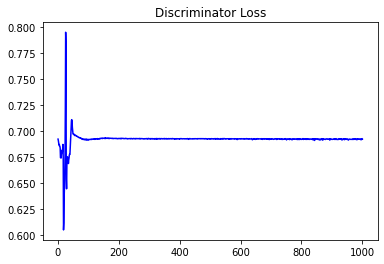

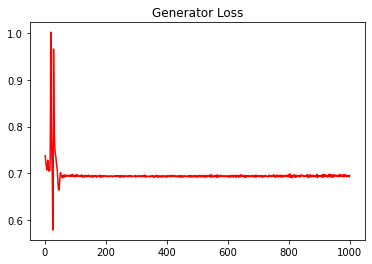

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.18944278806837975


#### Sanity Checks 

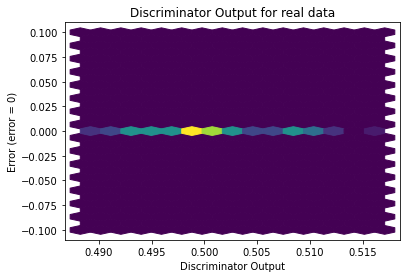

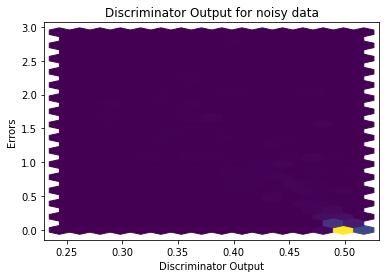

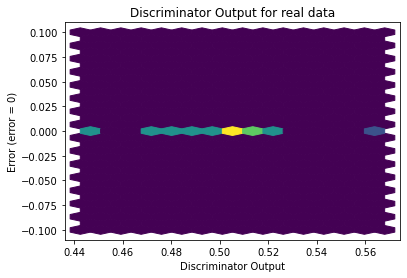

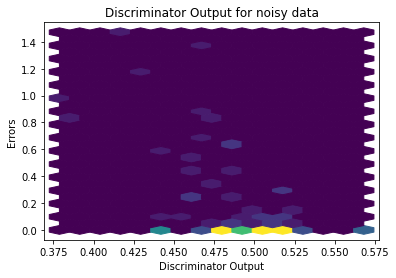

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


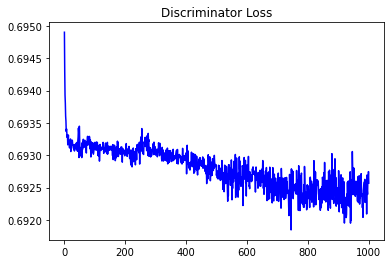

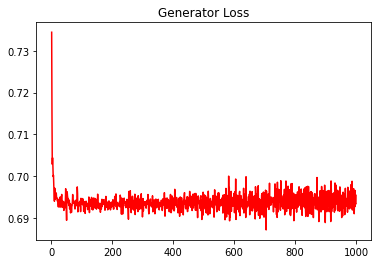

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.20708483648518955


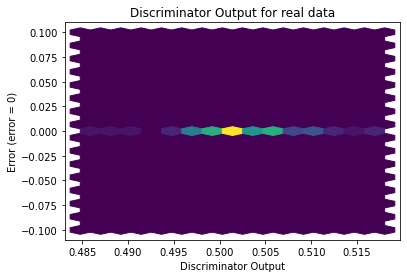

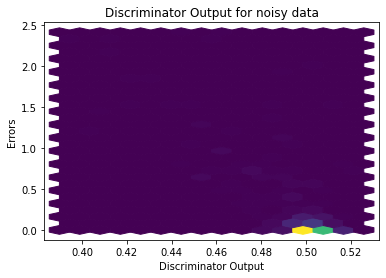

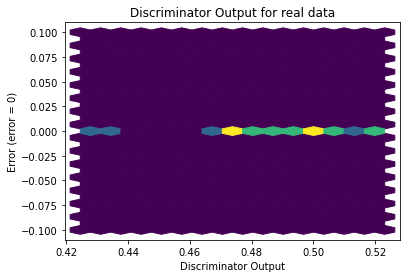

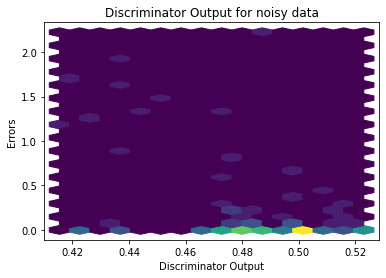

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1250]], device='cuda:0', requires_grad=True)
